# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no ‘log’ e um polinômio. Escolha o melhor modelo.

In [39]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [43]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'net_bill'],
      dtype='object')

In [105]:
# Criar as matrizes de design (y para dependente, X para independentes)
y, X = dmatrices('tip ~ sex + smoker + time + total_bill', data=tips[:5], return_type='dataframe')

# Ajustar o modelo estatístico usando statsmodels
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print("Resumo do modelo completo:")
print(model.summary())

# Acessar os resíduos do modelo ajustado
residuos = model.resid
print("\nResíduos do modelo:")
print(residuos)

Resumo do modelo completo:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4.234
Date:                Wed, 01 Jan 2025   Prob (F-statistic):              0.191
Time:                        13:32:56   Log-Likelihood:                -3.3036
No. Observations:                   5   AIC:                             12.61
Df Residuals:                       2   BIC:                             11.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        

/home/fabio/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [99]:
# Criar as matrizes de design (y para dependente, X para independentes)
y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo estatístico usando statsmodels
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo para identificar variáveis significantes
print(model.summary())

# Com base no p-valor identificado no resumo, remova variáveis não-significantes
# Aqui, removemos variáveis hipoteticamente (como `smoker` e `time`)
y_reduced, X_reduced = dmatrices('tip ~ sex + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo reduzido
model_reduced = sm.OLS(y_reduced, X_reduced).fit()

# Exibir o resumo do modelo reduzido
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           2.64e-20
Time:                        13:30:02   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

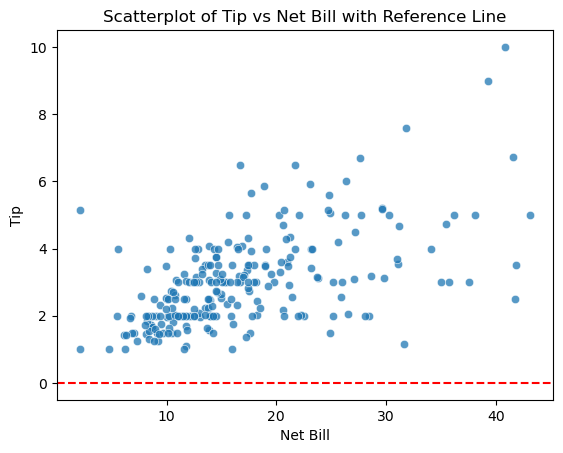

In [115]:
# Criar o gráfico de dispersão com Seaborn
sns.scatterplot(x='net_bill', y='tip', data=tips, alpha=0.75)

# Adicionar uma linha horizontal em y = 0
plt.axhline(y=0, color='r', linestyle='--')

# Adicionar rótulos e título (opcional)
plt.xlabel("Net Bill")
plt.ylabel("Tip")
plt.title("Scatterplot of Tip vs Net Bill with Reference Line")

# Exibir o gráfico
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           4.96e-22
Time:                        14:02:43   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

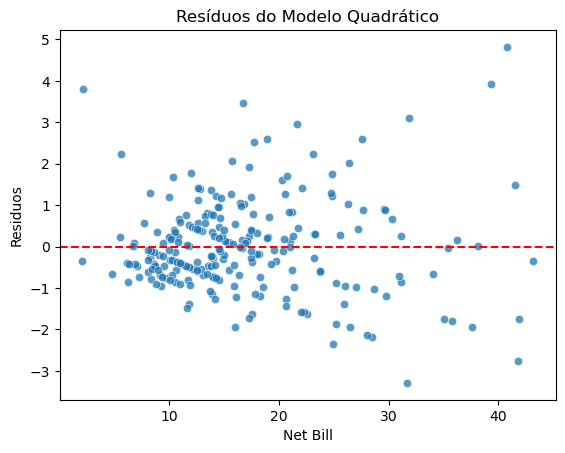

In [137]:
# Ajustar um modelo quadrático: tip ~ net_bill + net_bill^2
reg = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', data=tips).fit()

# Exibir o resumo do modelo
print(reg.summary())

# Adicionar os resíduos ao DataFrame
tips['log'] = reg.resid

# Visualizar os resíduos
sns.scatterplot(x='net_bill', y='log', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')  # Adicionar linha horizontal em y=0

# Personalizar o gráfico
plt.xlabel("Net Bill")
plt.ylabel("Residuos")
plt.title("Resíduos do Modelo Quadrático")

# Exibir o gráfico
plt.show()

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [156]:
# Criar as matrizes de design com Patsy
# Usando logaritmo natural de tip como variável dependente
y, X = dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Exibir os resultados
print("Matriz Y (variável dependente):")
print(y)
print("\nMatriz X (variáveis explicativas):")
print(X)

Matriz Y (variável dependente):
     np.log(tip)
0       0.009950
1       0.506818
2       1.252763
3       1.196948
4       1.283708
..           ...
239     1.778336
240     0.693147
241     0.693147
242     0.559616
243     1.098612

[244 rows x 1 columns]

Matriz X (variáveis explicativas):
     Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
0          1.0            1.0           1.0             1.0     15.98
1          1.0            0.0           1.0             1.0      8.68
2          1.0            0.0           1.0             1.0     17.51
3          1.0            0.0           1.0             1.0     20.37
4          1.0            1.0           1.0             1.0     20.98
..         ...            ...           ...             ...       ...
239        1.0            0.0           1.0             1.0     23.11
240        1.0            1.0           0.0             1.0     25.18
241        1.0            0.0           0.0             1.0     20.67
242 

In [158]:
# Criar as matrizes de design (y para dependente, X para independentes)
y, X = dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo estatístico usando statsmodels
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo para identificar variáveis significantes
print(model.summary())

# Com base no p-valor identificado no resumo, remova variáveis não-significantes
# Aqui, removemos variáveis hipoteticamente (como `smoker` e `time`)
y_reduced, X_reduced = dmatrices('tip ~ sex + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo reduzido
model_reduced = sm.OLS(y_reduced, X_reduced).fit()

# Exibir o resumo do modelo reduzido
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           2.64e-20
Time:                        14:14:49   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           4.96e-22
Time:                        14:14:51   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

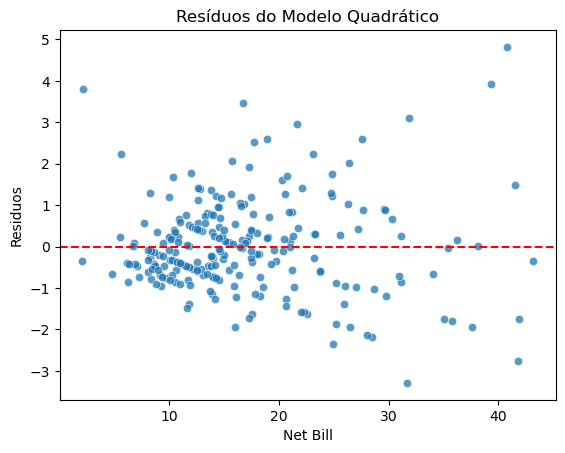

In [160]:
# Ajustar um modelo quadrático: tip ~ net_bill + net_bill^2
reg = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', data=tips).fit()

# Exibir o resumo do modelo
print(reg.summary())

# Adicionar os resíduos ao DataFrame
tips['log'] = reg.resid

# Visualizar os resíduos
sns.scatterplot(x='net_bill', y='log', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')  # Adicionar linha horizontal em y=0

# Personalizar o gráfico
plt.xlabel("Net Bill")
plt.ylabel("Residuos")
plt.title("Resíduos do Modelo Quadrático")

# Exibir o gráfico
plt.show()

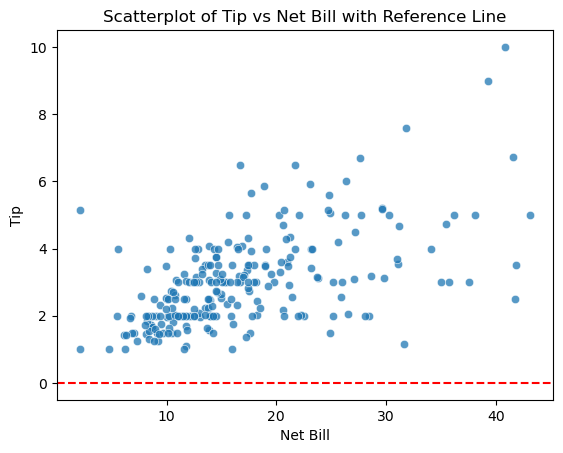

In [162]:
# Criar o gráfico de dispersão com Seaborn
sns.scatterplot(x='net_bill', y='tip', data=tips, alpha=0.75)

# Adicionar uma linha horizontal em y = 0
plt.axhline(y=0, color='r', linestyle='--')

# Adicionar rótulos e título (opcional)
plt.xlabel("Net Bill")
plt.ylabel("Tip")
plt.title("Scatterplot of Tip vs Net Bill with Reference Line")

# Exibir o gráfico
plt.show()

In [168]:
# Modelo no log (log(tip) como dependente)
log_model = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data=tips).fit()
print("\nResumo do modelo no log:")
print(log_model.summary())

# Transformar os valores previstos de volta para a escala original usando np.exp()
tips['log_pred'] = np.exp(log_model.fittedvalues)

# Modelo na escala original (tip como dependente)
linear_model = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()
print("\nResumo do modelo na escala original:")
print(linear_model.summary())

# Adicionar previsões à escala original ao DataFrame
tips['linear_pred'] = linear_model.fittedvalues

# Comparar coeficientes de determinação (R²)
print("\nCoeficientes de determinação (R²):")
print(f"Modelo no log (tip ~ log):       R² = {log_model.rsquared:.4f}")
print(f"Modelo na escala original (tip): R² = {linear_model.rsquared:.4f}")

# Exibir as previsões e reais para comparação
print("\nPrevisões do modelo no log (retransformadas):")
print(tips[['tip', 'log_pred', 'linear_pred']])


Resumo do modelo no log:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 01 Jan 2025   Prob (F-statistic):           1.21e-18
Time:                        14:20:12   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [329]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [331]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

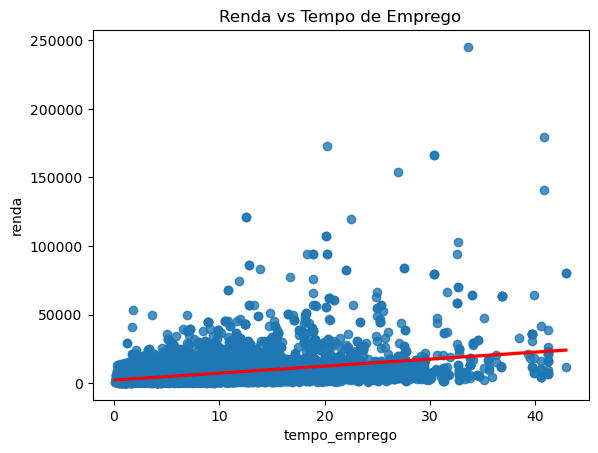

In [335]:
# Observando os dados
print(df.head())
print(df.describe())

# Verificando variáveis de interesse
print(df[['renda', 'tempo_emprego']].isnull().sum())

# Removendo valores nulos
df = df.dropna(subset=['renda', 'tempo_emprego'])

# Ajustando o modelo de regressão linear
X = df['tempo_emprego']  # Variável explicativa
y = df['renda']  # Variável resposta

# Adicionando constante para o modelo
X = sm.add_constant(X)

# Criando e ajustando o modelo
modelo = sm.OLS(y, X).fit()

# Sumário do modelo
print(modelo.summary())

# Visualizando a regressão com Seaborn
sns.regplot(x='tempo_emprego', y='renda', data=df, line_kws={'color': 'red'})
plt.title('Renda vs Tempo de Emprego')
plt.show()

In [337]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [339]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + renda + renda + 0', df[:5])
X

DesignMatrix with shape (5, 2)
  tempo_emprego    renda
        6.60274  8060.34
        7.18356  1852.15
        0.83836  2253.89
        4.84658  6600.77
        4.29315  6475.97
  Terms:
    'tempo_emprego' (column 0)
    'renda' (column 1)

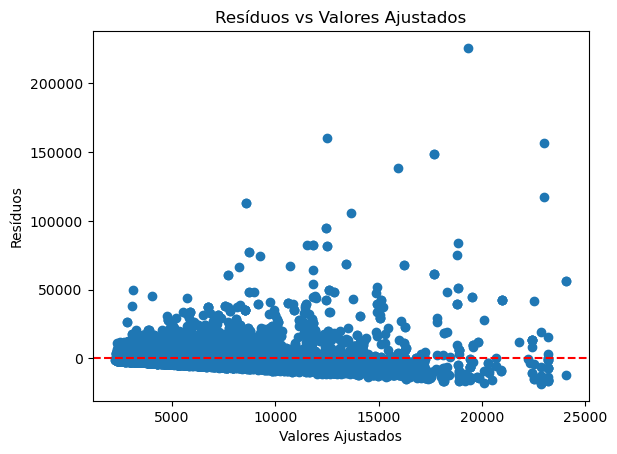

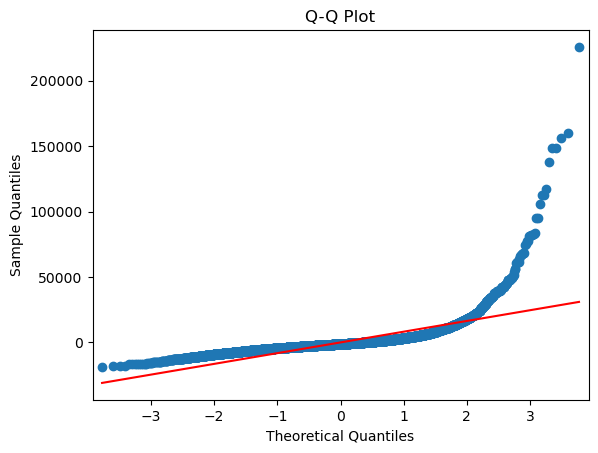

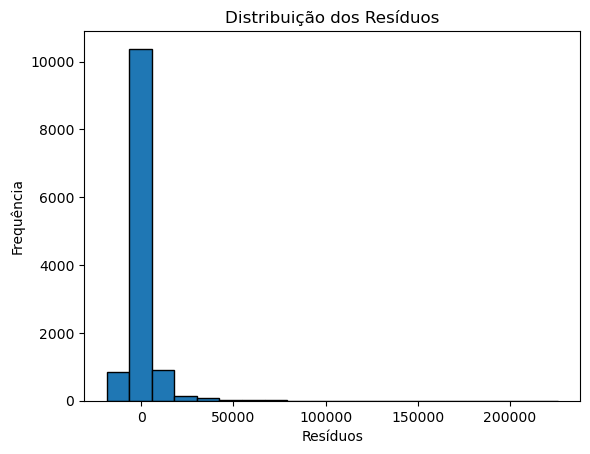

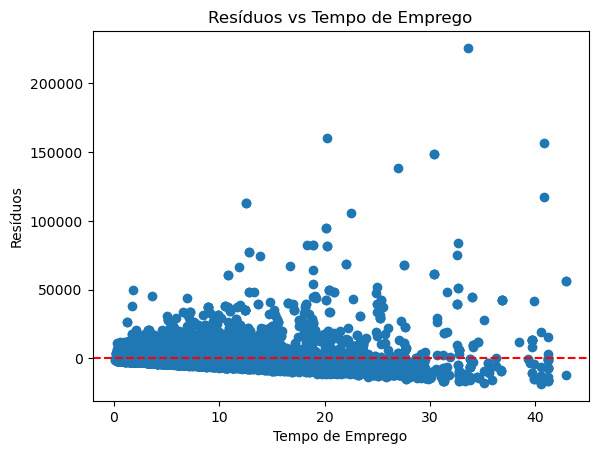

/tmp/ipykernel_69355/1443988045.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempo_emprego2'] = df['tempo_emprego'] ** 2


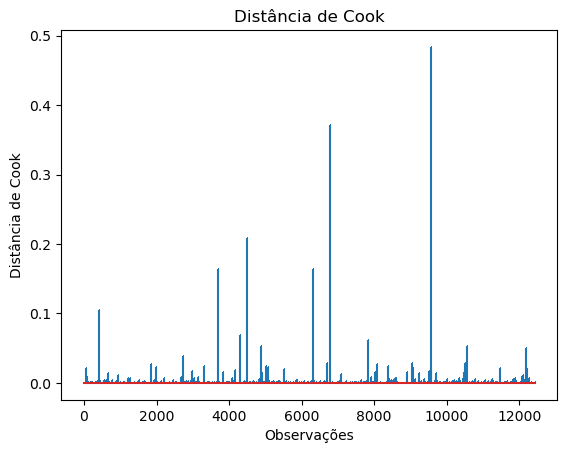

ValueError: endog and exog matrices are different sizes

In [341]:
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()


sm.qqplot(residuos, line='s')
plt.title('Q-Q Plot')
plt.show()

plt.hist(residuos, bins=20, edgecolor='black')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

plt.scatter(df['tempo_emprego'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Tempo de Emprego')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.show()

df['tempo_emprego2'] = df['tempo_emprego'] ** 2
X = sm.add_constant(df[['tempo_emprego', 'tempo_emprego2']])

influencias = modelo.get_influence()
distancia_cook = influencias.cooks_distance[0]
plt.stem(distancia_cook, markerfmt=",")
plt.title('Distância de Cook')
plt.xlabel('Observações')
plt.ylabel('Distância de Cook')
plt.show()

modelo_robusto = sm.RLM(y, X).fit()
print(modelo_robusto.summary())

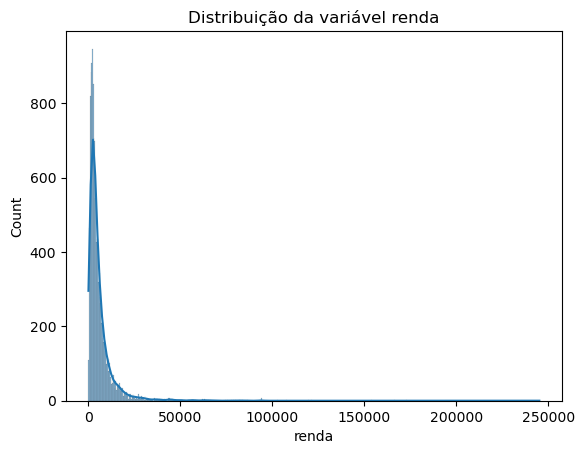

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:43:40   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

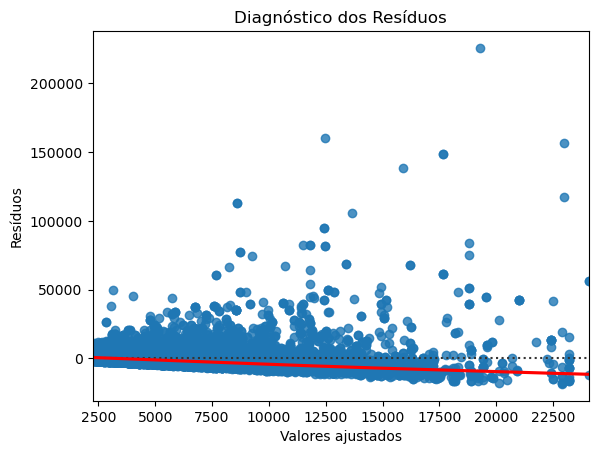

In [343]:


sns.histplot(df['renda'], kde=True)
plt.title("Distribuição da variável renda")
plt.show()

#df['renda_log'] = np.log(df['renda'])

y = df['renda']  # ou df['renda_log']
X = df[['idade','educacao']]



#X = sm.add_constant(X)
#modelo = sm.OLS(y, X).fit()

print(modelo.summary())

sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Diagnóstico dos Resíduos")
plt.show()


In [345]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'tempo_emprego2'],
      dtype='object')

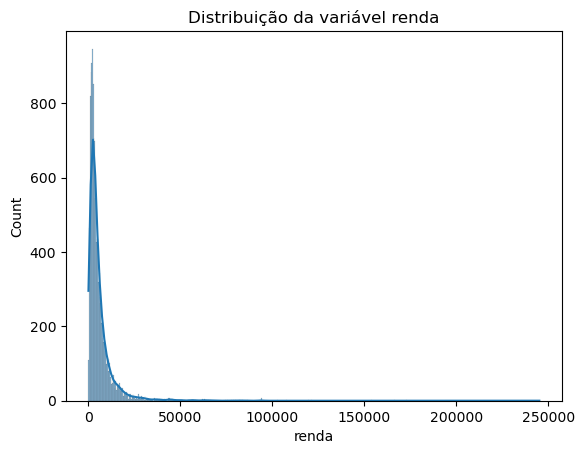

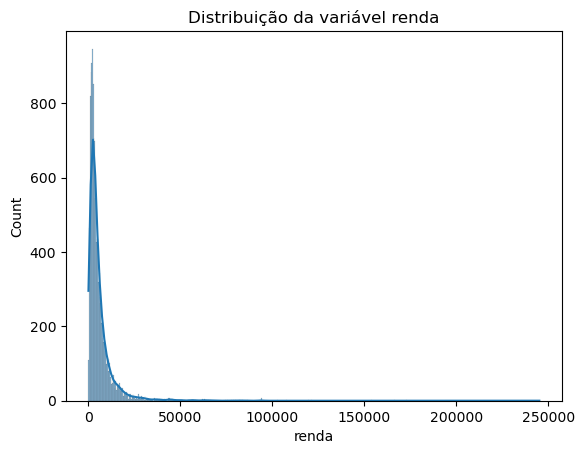

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:51:40   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

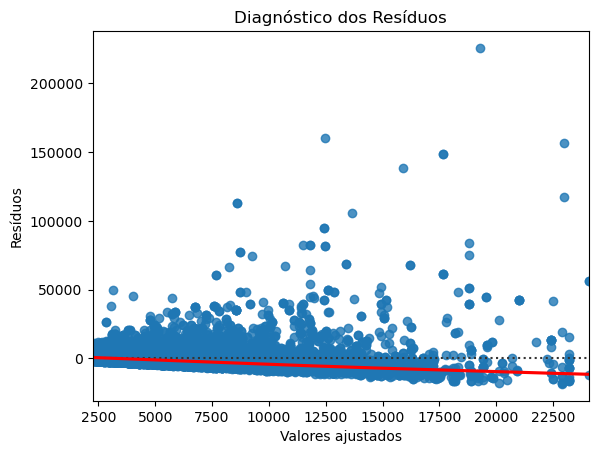

In [360]:
# Verificando a distribuição inicial da variável 'renda'
sns.histplot(df['renda'], kde=True)
plt.title("Distribuição da variável renda")
plt.show()

# Verificando a distribuição inicial da variável 'renda'
sns.histplot(df['renda'], kde=True)
plt.title("Distribuição da variável renda")
plt.show()

# Removendo valores nulos na variável de interesse
#df['renda_log'] = np.log(df['renda'])
df = df.dropna(subset=['renda', 'idade', 'educacao'])

# Definindo as variáveis inicial do modelo
y = df['renda']  # ou df['renda_log']
y = df['renda']
X = df[['idade','educacao']]
X = pd.get_dummies(df[['idade', 'educacao']], drop_first=True)  # Transformando 'educacao' em variáveis dummies
X = sm.add_constant(X)  # Adiciona constante ao modelo

# Ajuste inicial do modelo
#modelo_inicial = sm.OLS(y, X).fit()
#print(modelo_inicial.summary())

# Selecionando apenas variáveis significativas com base no p-valor
# Mantemos as variáveis cujo p-valor < 0.05
#variaveis_significativas = modelo_inicial.pvalues[modelo_inicial.pvalues < 0.05].index

#X = sm.add_constant(X)
# Ajustando o modelo apenas com variáveis significativas
#X_significativas = X[variaveis_significativas]
#modelo = sm.OLS(y, X).fit()
#modelo_final = sm.OLS(y, X_significativas).fit()
#print(modelo_final.summary())

print(modelo.summary())
# Análises dos resultados:
# 1. O coeficiente da constante indica o valor base de 'renda' quando todas as variáveis explicativas são zero.
# 2. Cada coeficiente das variáveis significa o impacto unitário esperado na variável dependente 'renda',
#    considerando que as demais variáveis são mantidas constantes.
#    - Por exemplo, coeficiente de 'idade' indica quanto a 'renda' varia quando a idade aumenta em um unidade.

# Diagnóstico visual dos resíduos
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={"color": "red"})
#sns.residplot(x=modelo_final.fittedvalues, y=modelo_final.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Diagnóstico dos Resíduos")
plt.show()

# As análises anteriores ajudam a observar se ainda há um padrão nos resíduos,
# o que indica problemas no ajuste ou necessidade de transformação nas variáveis.


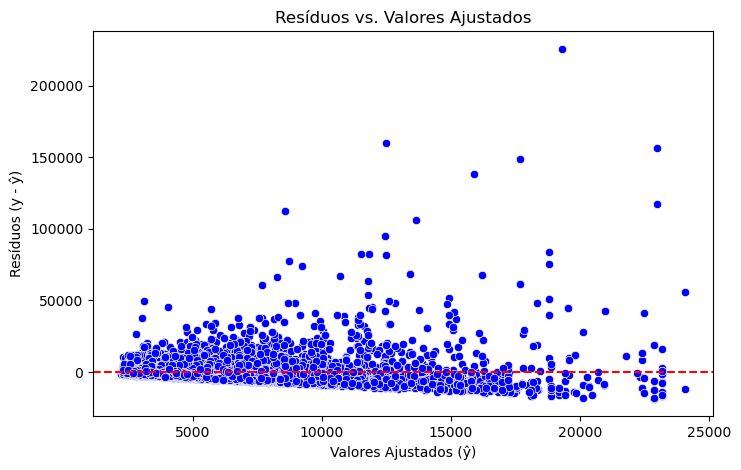

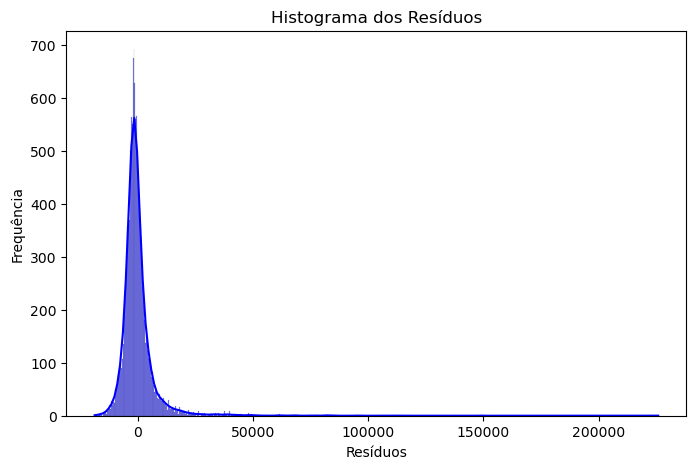

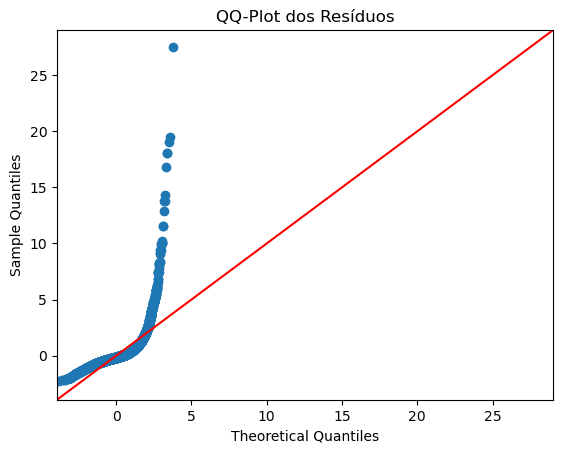

Teste de Shapiro-Wilk: p-valor = 0.0000
Os resíduos não seguem uma distribuição normal (rejeitamos H0).


/home/fabio/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12427.
  res = hypotest_fun_out(*samples, **kwds)


In [362]:
# Calcular os resíduos do modelo
#residuos = modelo_inicial.resid  # Resíduos: y - ŷ
#valores_ajustados = modelo_inicial.fittedvalues  # Valores ajustados (ŷ)

# Gráfico dos resíduos vs. valores ajustados
plt.figure(figsize=(8, 5))
sns.scatterplot(x=valores_ajustados, y=residuos, color='blue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados (ŷ)')
plt.ylabel('Resíduos (y - ŷ)')
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# QQ-Plot dos resíduos (normalidade)
sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ-Plot dos Resíduos')
plt.show()

# Estatísticas adicionais
#r2 = modelo_inicial.rsquared  # Coeficiente de determinação (R²)
#print(f"R² do Modelo: {r2:.4f}")

# Teste de normalidade dos resíduos (Shapiro-Wilk)
from scipy.stats import shapiro

shapiro_stat, shapiro_p = shapiro(residuos)
print(f"Teste de Shapiro-Wilk: p-valor = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Os resíduos seguem uma distribuição normal (não rejeitamos H0).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0).")

# Teste de homocedasticidade (Breusch-Pagan)
from statsmodels.stats.diagnostic import het_breuschpagan

#bp_test = het_breuschpagan(residuos, modelo_inicial.model.exog)
#print(f"Teste de Breusch-Pagan: p-valor = {bp_test[1]:.4f}")
#if bp_test[1] > 0.05:
#    print("Os resíduos são homocedásticos (não rejeitamos H0).")
#else:
#    print("Os resíduos não são homocedásticos (rejeitamos H0).")